In this project, I build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

The aim of building a machine learning model is to solve a problem and to define a metric to measure model performance.
The problem is to model and investigate the linear relationship between Sales and Advertising dataset for a dietary weight control product.

## Import libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Exploratory data analysis

## import data set


In [2]:
# Import the data

df = pd.read_excel(r"Advertising.csv")

## EDA

In [3]:
# Exploratory data analysis

# View the dimensions of df

print(df.shape)

(36, 2)


In [4]:
# View the top 5 rows of df

print(df.head())

   Unnamed: 0  Unnamed: 1
0        12.0          15
1        20.5          16
2        21.0          18
3        15.5          27
4        15.3          21


In [5]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [11]:
# View the top 5 rows of df with column names renamed

print(df.head())

   Sales  Advertising
0   12.0           15
1   20.5           16
2   21.0           18
3   15.5           27
4   15.3           21


In [12]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 704.0 bytes
None


In [13]:
# View descriptive statistics

print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


In [32]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab05a5d5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab05a5dca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab05a5d280>,
 'medians': [<matplotlib.lines.Line2D at 0x1ab05a683a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ab05a68700>,
 'means': []}

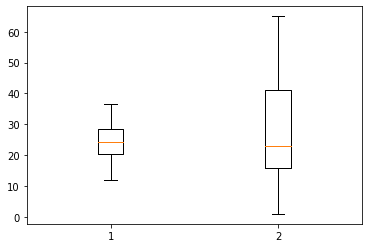

In [33]:
plt.boxplot(df)

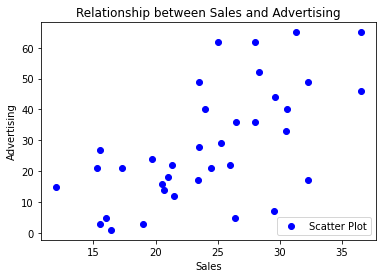

In [15]:

# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [16]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(36,)
(36,)


In [17]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [18]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


In [19]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:

# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [21]:

# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

In [23]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [24]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [26]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


In [27]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.5789


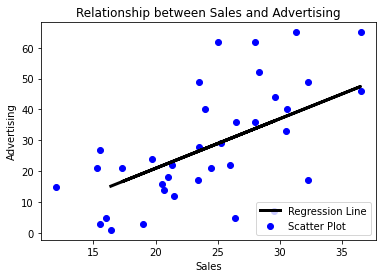

In [28]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

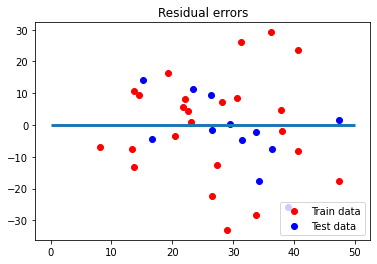

In [29]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [30]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2861
Test set score: 0.5789
